### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Triyasha Ghosh Dastidar
### UNI: tg2936

##Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [ ]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
X,Y

(array([[0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        ...,
        [0.60504302, 0.30290481],
        [0.57728401, 0.16967812],
        [0.15946909, 0.41702974]]),
 array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 

In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    # Your code here
    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)
    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # Your code here

    dLdZ1 = dLdH * (H * (1 - H))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.sum(dLdZ1, axis=0)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [ ]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

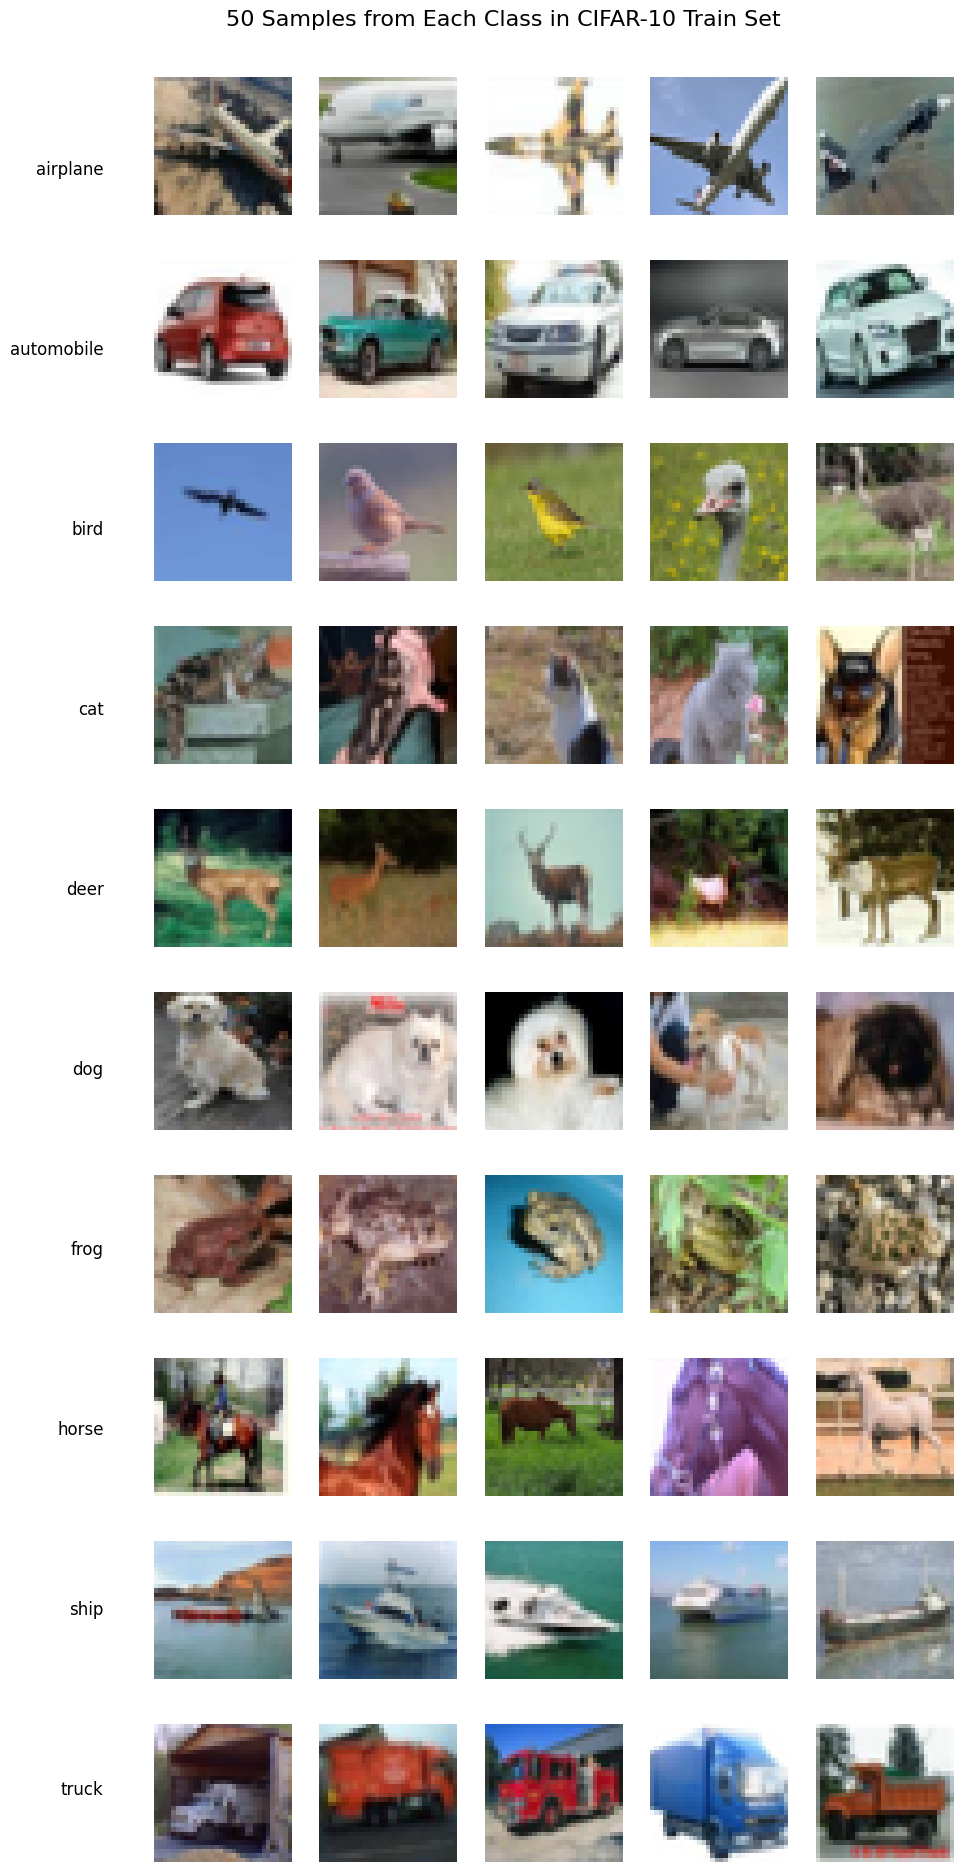

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(10, 20))
fig.suptitle("50 Samples from Each Class in CIFAR-10 Train Set", fontsize=16)

for class_index in range(10):
    class_samples = x_dev[y_dev.flatten() == class_index]
    random_indices = np.random.choice(class_samples.shape[0], 5, replace=False)
    for i, index in enumerate(random_indices):
        axs[class_index, i].imshow(class_samples[index])
        axs[class_index, i].axis('off')

# Adjust layout to add more space on the left for labels
plt.subplots_adjust(left=0.15, top=0.95, bottom=0.05, right=0.95)

# Add class labels to the left side of each row
for class_index in range(10):
    fig.text(0.1, 0.9 - (class_index * 0.09), LABELS[class_index], ha='right', va='center', fontsize=12)

plt.show()


###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [ ]:
#1
print("Original shapes:")
print("x_dev shape:", x_dev.shape)
print("y_dev shape:", y_dev.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Original shapes:
x_dev shape: (50000, 32, 32, 3)
y_dev shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#2
# 32*32*2 -> 3072
x_dev_flat = x_dev.reshape(x_dev.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("\nShapes after flattening:")
print("x_dev_flat shape:", x_dev_flat.shape)
print("x_test_flat shape:", x_test_flat.shape)


Shapes after flattening:
x_dev_flat shape: (50000, 3072)
x_test_flat shape: (10000, 3072)


In [ ]:
#3
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
x_dev_flat = scaler.fit_transform(x_dev_flat)
x_test_flat = scaler.transform(x_test_flat)

In [ ]:
#4
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_dev_onehot = encoder.fit_transform(y_dev)
y_test_onehot = encoder.transform(y_test)

print("Shapes after one-hot encoding:")
print("y_dev_onehot shape:", y_dev_onehot.shape)
print("y_test_onehot shape:", y_test_onehot.shape)

Shapes after one-hot encoding:
y_dev_onehot shape: (50000, 10)
y_test_onehot shape: (10000, 10)


In [ ]:
#5
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_dev_flat, y_dev_onehot, test_size=0.2, random_state=42)

print("\nShapes after train-validation split:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)


Shapes after train-validation split:
x_train shape: (40000, 3072)
y_train shape: (40000, 10)
x_val shape: (10000, 3072)
y_val shape: (10000, 10)


### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

output_size = 10

# Build the feedforward neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(3072,)),
    Dense(64, activation='relu'),
    Dense(output_size, activation='softmax')
])


###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

###2.5 Do you think the number of parameters is dependent on the image height and width?

Yes, the number of parameters in a neural network can indeed depend on the height and width of the input images, especially in the case of fully connected (dense) layers.

If the image height and width change, it will affect the size of the flattened input vector, which in turn will affect the number of weights and biases in the subsequent layers of the model.

The flattened layer is calculated using the image dimensions and the number of channels.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [ ]:
#modify name of X_train based on your requirement
output = model.predict(x_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3305 - loss: 1.9866 - val_accuracy: 0.4250 - val_loss: 1.6473
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4551 - loss: 1.5505 - val_accuracy: 0.4566 - val_loss: 1.5427
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5002 - loss: 1.4276 - val_accuracy: 0.4770 - val_loss: 1.5055
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5222 - loss: 1.3539 - val_accuracy: 0.4746 - val_loss: 1.5190
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5380 - loss: 1.3003 - val_accuracy: 0.4711 - val_loss: 1.5006
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5674 - loss: 1.2364 - val_accuracy: 0.4751 - val_loss: 1.5334
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5807 - loss: 1.1884 - val_accuracy: 0.4947 - val_loss: 1.4914
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5987 - loss: 1.1475 - val_accur

###2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


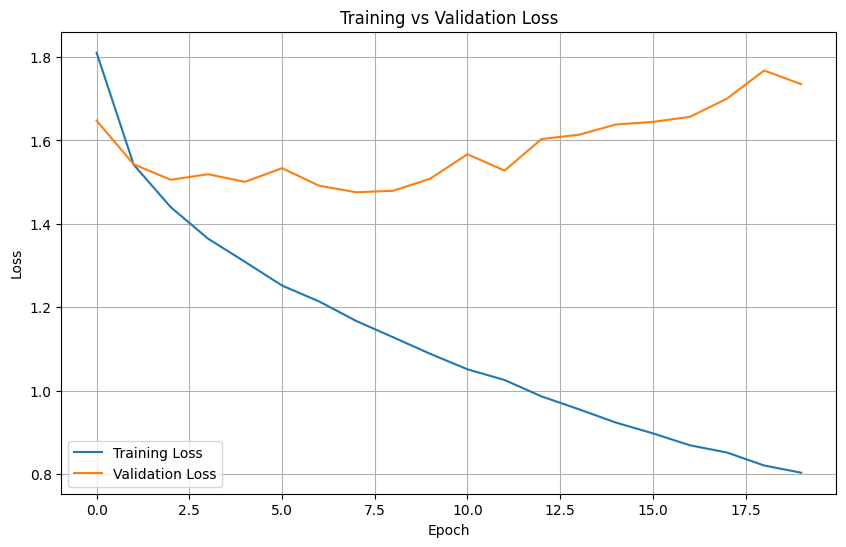

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting train loss vs validation loss per epoch
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#### 2.7.2 Display the train vs validation accuracy over each epoch

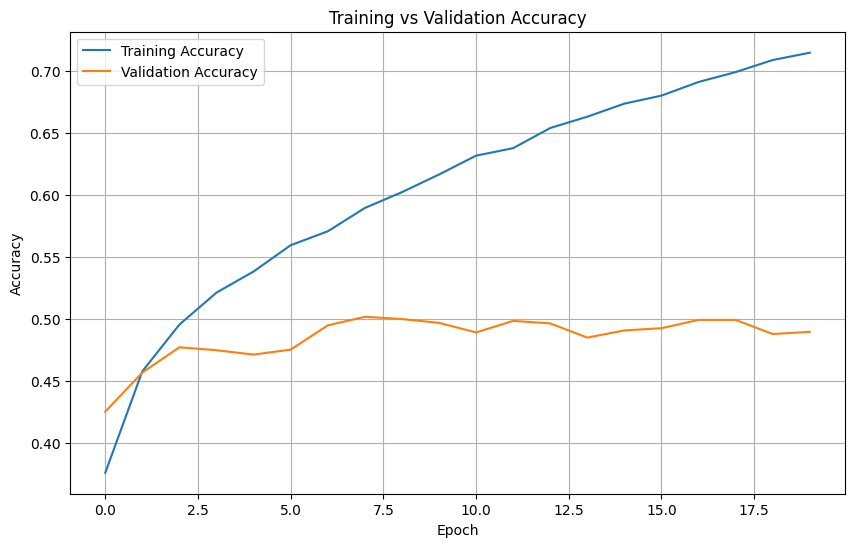

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting train accuracy vs validation accuracy per epoch
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### 2.8 Finally, report the metric chosen on test set

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_onehot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4954 - loss: 1.7220
Test Accuracy: 49.05%


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


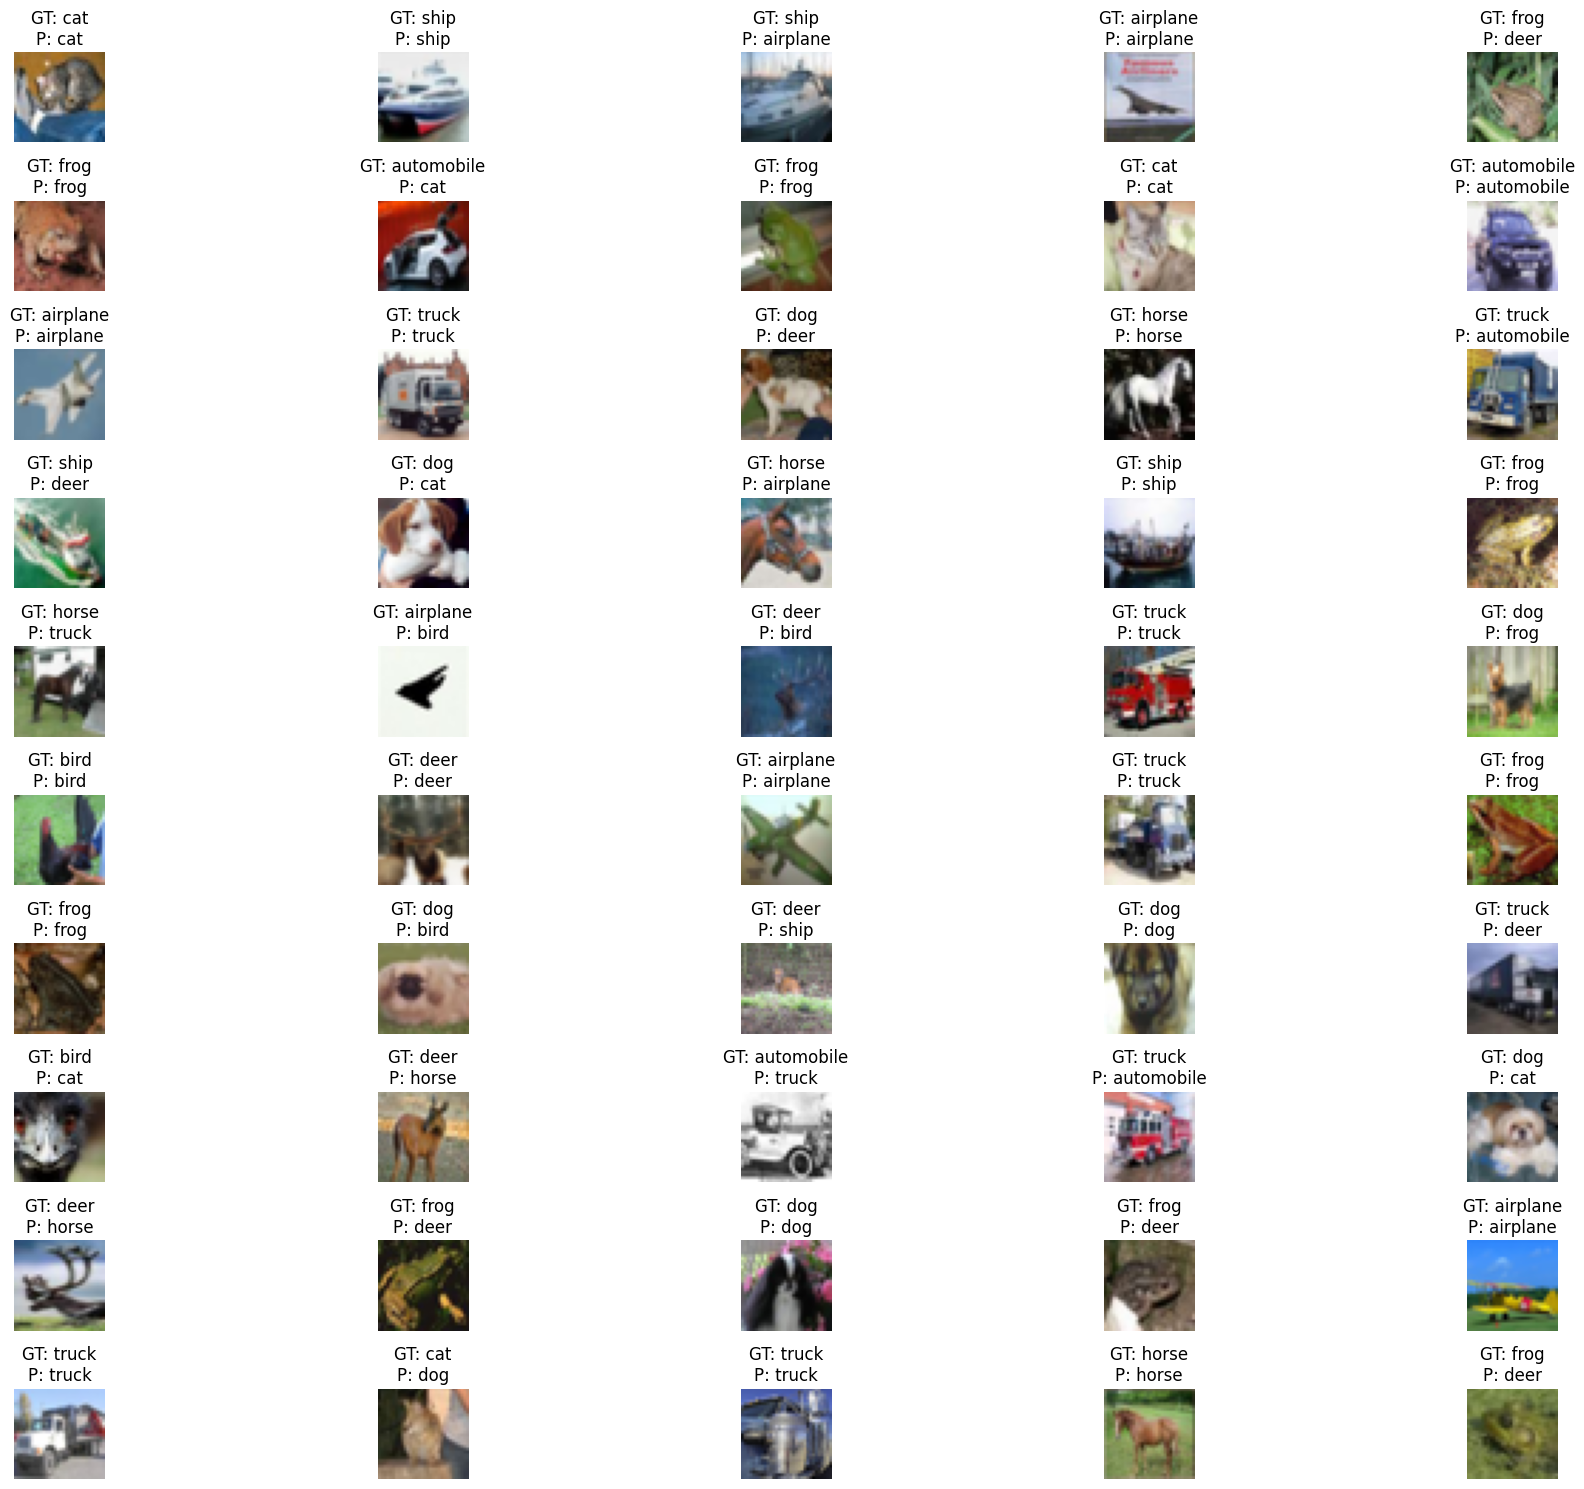

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the class labels for the test dataset
y_test_pred = model.predict(x_test_flat)

# Convert predictions from one-hot encoding to class labels
y_test_pred_class = np.argmax(y_test_pred, axis=1)
y_test_true_class = np.argmax(y_test_onehot, axis=1)

plt.figure(figsize=(20, 15))

for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    plt.title(f"GT: {LABELS[y_test_true_class[i]]}\nP: {LABELS[y_test_pred_class[i]]}")

plt.tight_layout()
plt.show()


# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [ ]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

**We should be using softmax activation in the output layer since we need to convert logit to probability.**

In [ ]:
from tensorflow.keras import layers, models

# Build the LeNet-5 CNN model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

### 3.2 Report the model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3396 - loss: 1.7937 - val_accuracy: 0.5004 - val_loss: 1.3731
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5187 - loss: 1.3439 - val_accuracy: 0.5350 - val_loss: 1.2907
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5660 - loss: 1.2153 - val_accuracy: 0.5747 - val_loss: 1.2030
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6022 - loss: 1.1196 - val_accuracy: 0.5783 - val_loss: 1.1975
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6249 - loss: 1.0538 - val_accuracy: 0.5964 - val_loss: 1.1382
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6551 - loss: 0.9793 - val_accuracy: 0.5984 - val_loss: 1.1481
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6683 - loss: 0.9254 - val_accuracy: 0.6065 - val_loss: 1.1155
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6899 - loss: 0.8745 -

In [ ]:
for epoch in range(20):
    print(f"Epoch {epoch+1}:")
    print(f"  Train Loss: {history.history['loss'][epoch]:.4f}")
    print(f"  Train Accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"  Validation Loss: {history.history['val_loss'][epoch]:.4f}")
    print(f"  Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

Epoch 1:
  Train Loss: 1.5922
  Train Accuracy: 0.4196
  Validation Loss: 1.3731
  Validation Accuracy: 0.5004
Epoch 2:
  Train Loss: 1.3171
  Train Accuracy: 0.5271
  Validation Loss: 1.2907
  Validation Accuracy: 0.5350
Epoch 3:
  Train Loss: 1.2071
  Train Accuracy: 0.5670
  Validation Loss: 1.2030
  Validation Accuracy: 0.5747
Epoch 4:
  Train Loss: 1.1176
  Train Accuracy: 0.6018
  Validation Loss: 1.1975
  Validation Accuracy: 0.5783
Epoch 5:
  Train Loss: 1.0533
  Train Accuracy: 0.6252
  Validation Loss: 1.1382
  Validation Accuracy: 0.5964
Epoch 6:
  Train Loss: 0.9918
  Train Accuracy: 0.6478
  Validation Loss: 1.1481
  Validation Accuracy: 0.5984
Epoch 7:
  Train Loss: 0.9359
  Train Accuracy: 0.6665
  Validation Loss: 1.1155
  Validation Accuracy: 0.6065
Epoch 8:
  Train Loss: 0.8880
  Train Accuracy: 0.6848
  Validation Loss: 1.1032
  Validation Accuracy: 0.6148
Epoch 9:
  Train Loss: 0.8398
  Train Accuracy: 0.7021
  Validation Loss: 1.1039
  Validation Accuracy: 0.6319
E

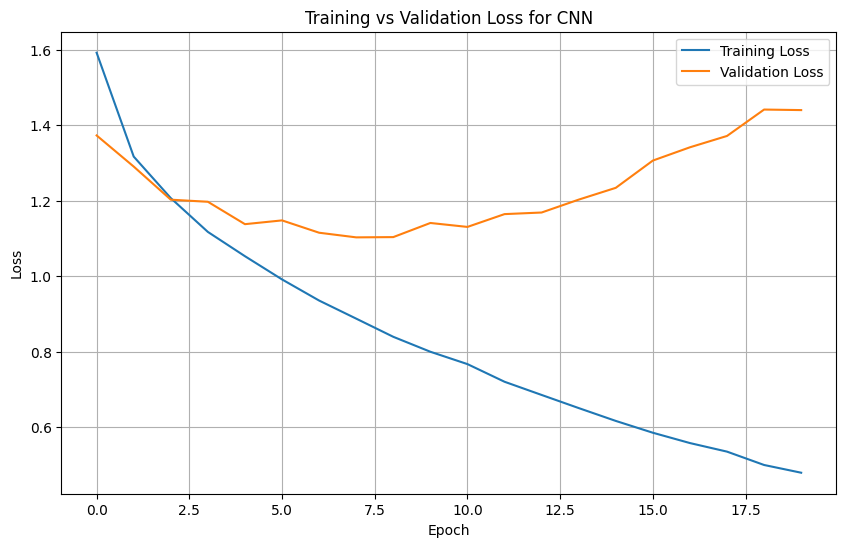

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting train loss vs validation loss per epoch
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss for CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


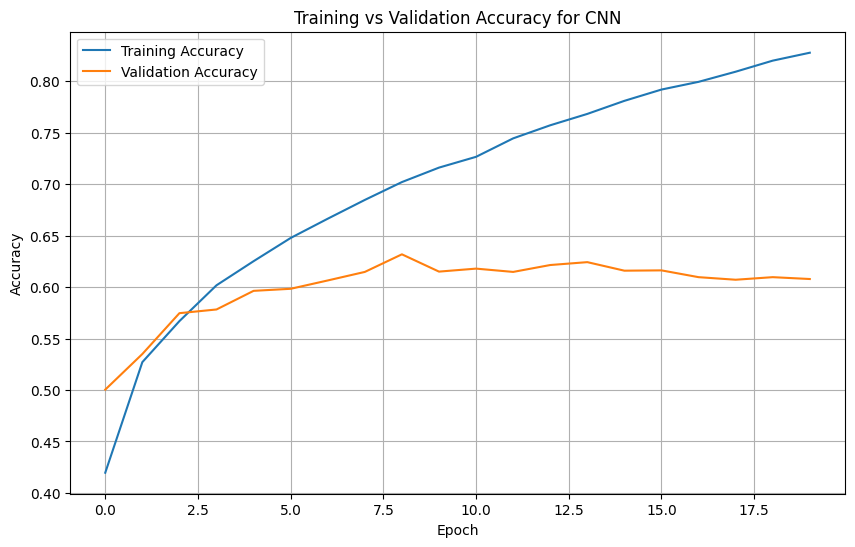

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting train accuracy vs validation accuracy per epoch
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy for CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy for CNN: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6041 - loss: 1.5190
Test Accuracy for CNN: 60.41%


### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2415 - loss: 2.0269 - val_accuracy: 0.4039 - val_loss: 1.6726
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4040 - loss: 1.6281 - val_accuracy: 0.4816 - val_loss: 1.4508
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4407 - loss: 1.5465 - val_accuracy: 0.4983 - val_loss: 1.4170
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4607 - loss: 1.4964 - val_accuracy: 0.5168 - val_loss: 1.3509
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4818 - loss: 1.4416 - val_accuracy: 0.5196 - val_loss: 1.3481
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4910 - loss: 1.4176 - val_accuracy: 0.5471 - val_loss: 1.2834
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5015 - loss: 1.3948 - val_accuracy: 0.5557 - val_loss: 1.2577
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5143 - loss: 1.3

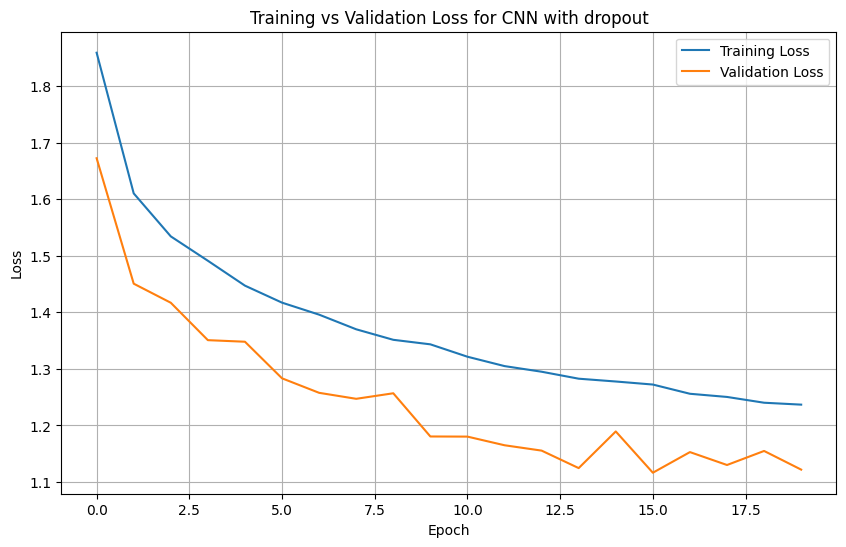

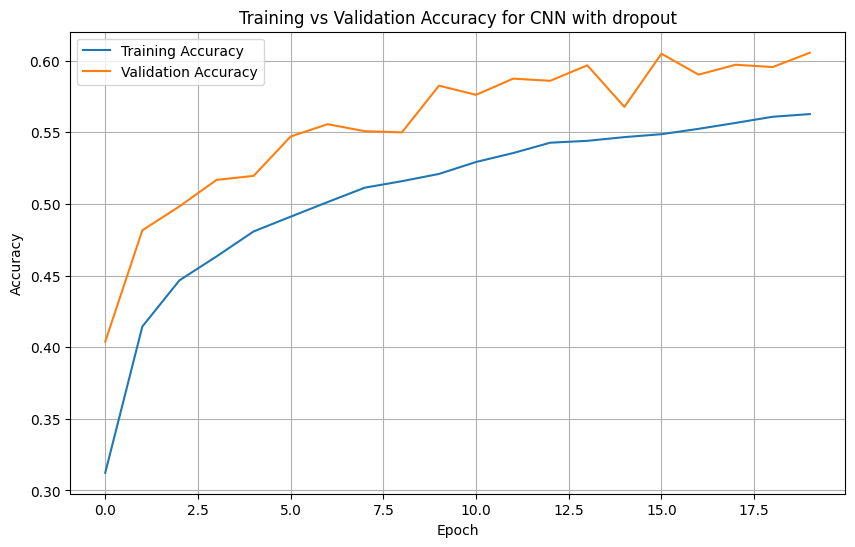

In [ ]:
# Adding dropout according to https://edstem.org/us/courses/65600/discussion/5710766
model_dropout = models.Sequential([
    layers.Conv2D(6, (5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout after MaxPooling
    layers.Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout after MaxPooling
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dropout(0.3),  # Dropout after Dense layer
    layers.Dense(84, activation='relu'),
    layers.Dropout(0.3),  # Dropout after Dense layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

print(model_dropout.summary())
model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_dropout.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

for epoch in range(20):
    print(f"Epoch {epoch+1}:")
    print(f"  Train Loss: {history.history['loss'][epoch]:.4f}")
    print(f"  Train Accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"  Validation Loss: {history.history['val_loss'][epoch]:.4f}")
    print(f"  Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

test_loss, test_accuracy = model_dropout.evaluate(x_test, y_test)
print(f"Test Accuracy for CNN with dropout: {test_accuracy * 100:.2f}%")

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting train loss vs validation loss per epoch
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss for CNN with dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting train accuracy vs validation accuracy per epoch
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy for CNN with dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




#### 3.4.2 Batch Normalization

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 6)           │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 84)                  │             336 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,030 (328.24 KB)

 Trainable params: 83,578 (326.48 KB)

 Non-trainable params: 452 (1.77 KB)

None
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3915 - loss: 1.7479 - val_accuracy: 0.4741 - val_loss: 1.4850
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5576 - loss: 1.2410 - val_accuracy: 0.5962 - val_loss: 1.1493
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6172 - loss: 1.0961 - val_accuracy: 0.5206 - val_loss: 1.4086
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6460 - loss: 1.0068 - val_accuracy: 0.5219 - val_loss: 1.4468
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6769 - loss: 0.9239 - val_accuracy: 0.6124 - val_loss: 1.0902
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6913 - loss: 0.8744 - val_accuracy: 0.6288 - val_loss: 1.0787
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7071 - loss: 0.8262 - val_accuracy: 0.6462 - val_loss: 1.0196
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7329 - loss: 0.7

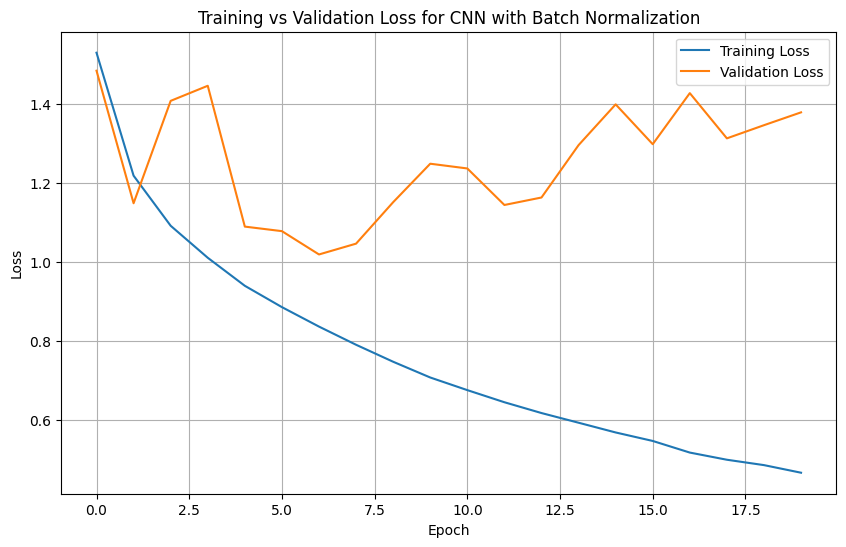

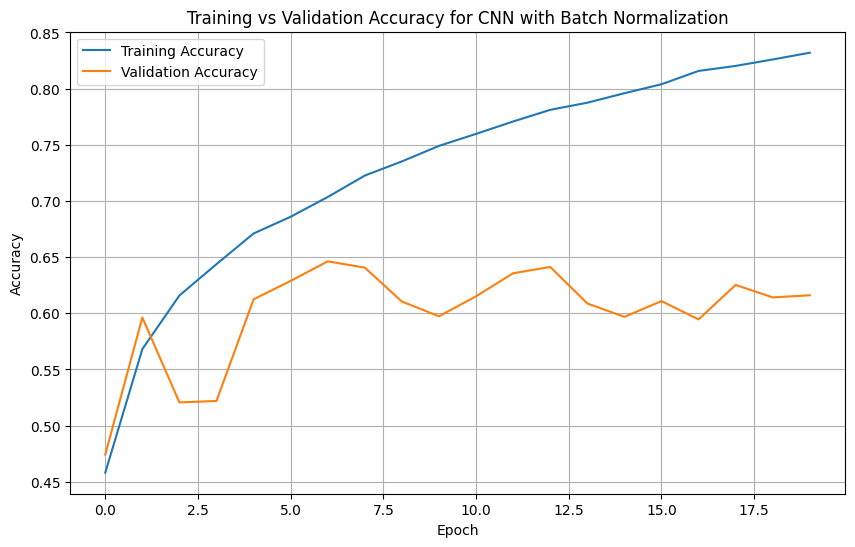

In [16]:
model_batch_norm = models.Sequential([
    layers.Conv2D(6, (5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Batch normalization after Conv2D
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu'),
    layers.BatchNormalization(),  # Batch normalization after Conv2D
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization after Dense layer
    layers.Dense(84, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization after Dense layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

print(model_batch_norm.summary())

model_batch_norm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_batch_norm = model_batch_norm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Report performance on the test set
test_loss, test_accuracy = model_batch_norm.evaluate(x_test, y_test)
print(f"Test Accuracy for CNN with batch normalization: {test_accuracy * 100:.2f}%")

# Plotting train loss vs validation loss per epoch
train_loss = history_batch_norm.history['loss']
val_loss = history_batch_norm.history['val_loss']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss for CNN with Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train accuracy vs validation accuracy per epoch
train_acc = history_batch_norm.history['accuracy']
val_acc = history_batch_norm.history['val_accuracy']
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy for CNN with Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

| Model                           | Test Accuracy |
|---------------------------------|---------------|
| CNN with Dropout                | 60.65%       |
| CNN                             | 60.41%       |
| CNN with Batch Normalization    | 61.18%       |


Traditionally, with batch normalization and dropout added between layers, overfitting should be regulairzed.
The table suggests that batch normalization may be more effective at reducing overfitting compared to dropout. Batch normalization helps by stabilizing the learning process and making the model less sensitive to initialization and learning rates, which often results in better generalization. However, we still see a huge difference between the training and validation accuracies in all three cases. Further hyperparameter tuning might help in fixing this issue. Choice of loss function might also be a reason for this.